# Sobel Operator

# Prewitt Operator

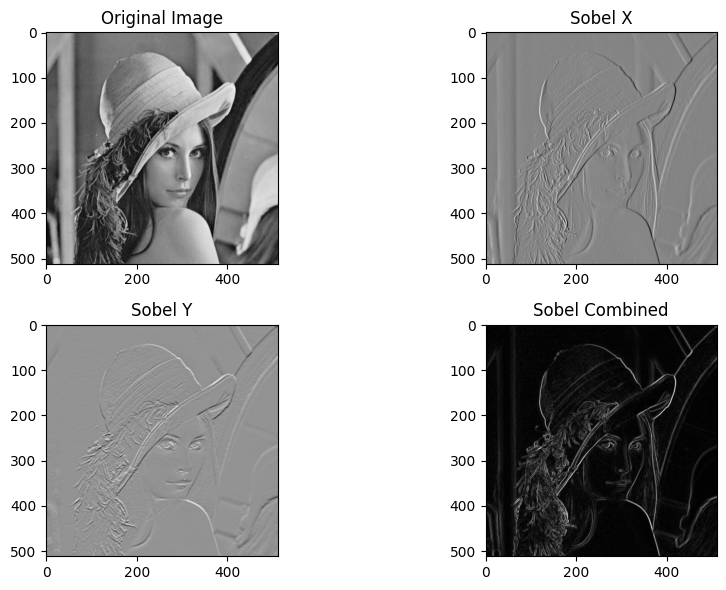

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request # Used to download the image

# Download the image and save it locally
urllib.request.urlretrieve('https://github.com/opencv/opencv/raw/master/samples/data/lena.jpg', 'lena.jpg')


 # Load the image
image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator in X and Y directions
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combine gradients
sobel_combined = cv2.magnitude(sobelx, sobely)

# Display results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(2, 2, 3), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.subplot(2, 2, 4), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


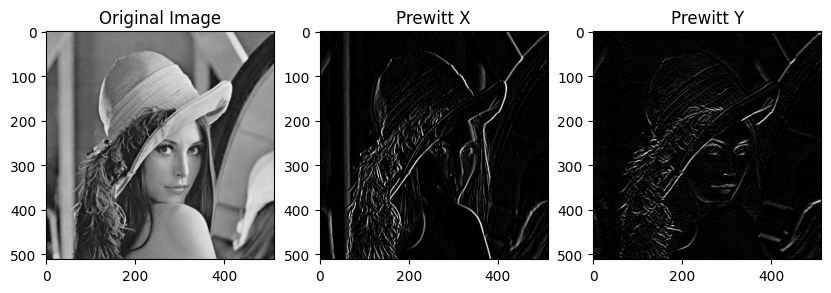

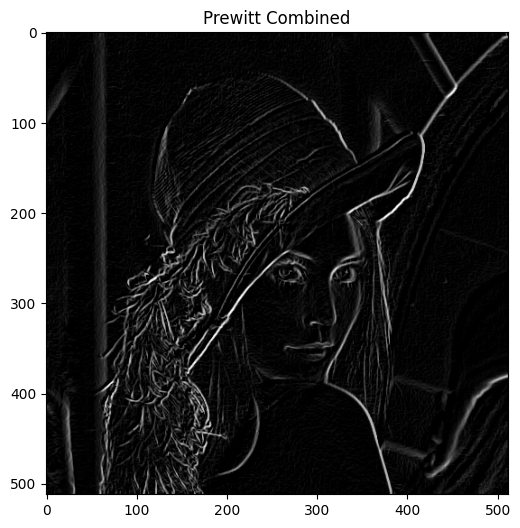

In [ ]:
prewittx_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewittx = cv2.filter2D(image, -1, prewittx_kernel)
prewitty = cv2.filter2D(image, -1, prewitty_kernel)

prewitt_combined = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(prewittx, cmap='gray'), plt.title('Prewitt X')
plt.subplot(1, 3, 3), plt.imshow(prewitty, cmap='gray'), plt.title('Prewitt Y')
plt.figure(figsize=(6,6))
plt.imshow(prewitt_combined, cmap='gray'), plt.title('Prewitt Combined')
plt.show()


In [ ]:
# Install OpenCV
!pip install opencv-python opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

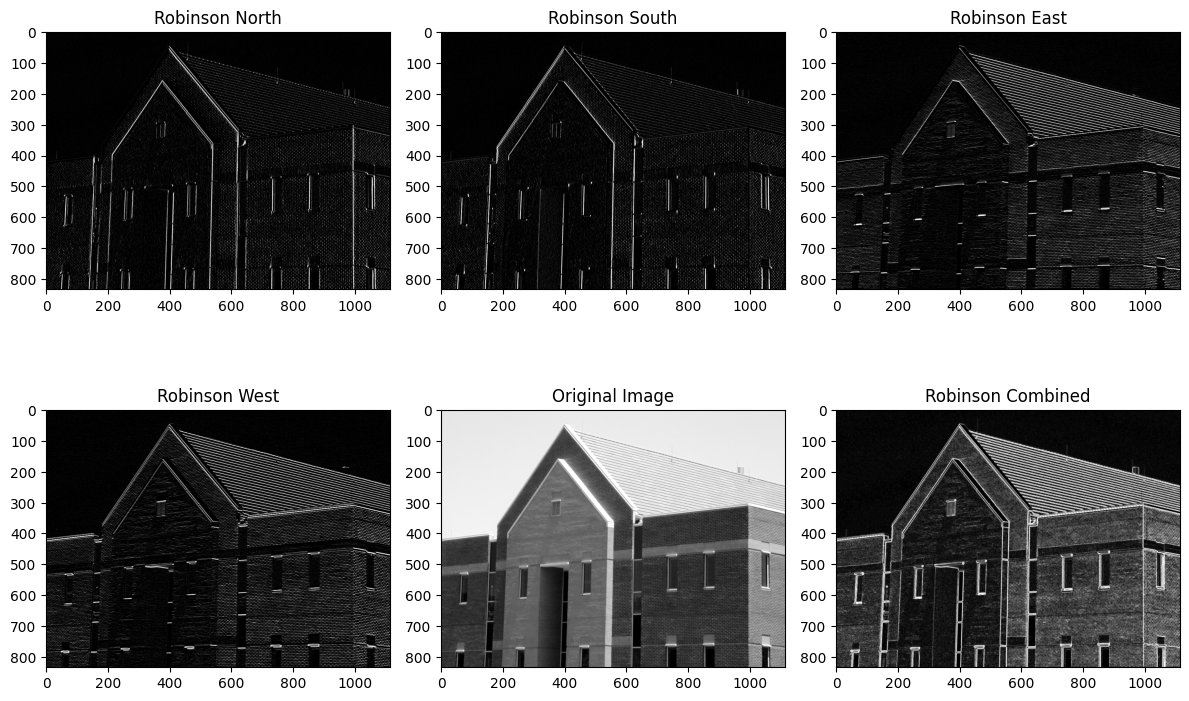

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Fig1025(a)(building_original).tif', cv2.IMREAD_GRAYSCALE)

# Define Robinson Compass Kernels
robinson_kernels = {
    'north': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    'south': np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
    'east': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'west': np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
}

# Prepare response arrays
responses = {}
combined_response = np.zeros_like(image, dtype=float)

# Apply each directional kernel and store the results
for direction, kernel in robinson_kernels.items():
    filtered_image = cv2.filter2D(image, -1, kernel)
    responses[direction] = filtered_image.astype(float)
    combined_response = np.maximum(combined_response, filtered_image.astype(float))

# Plot all directions and the combined result
plt.figure(figsize=(12, 8))

# Subplot for North
plt.subplot(2, 3, 1)
plt.imshow(responses['north'], cmap='gray')
plt.title('Robinson North')

# Subplot for South
plt.subplot(2, 3, 2)
plt.imshow(responses['south'], cmap='gray')
plt.title('Robinson South')

# Subplot for East
plt.subplot(2, 3, 3)
plt.imshow(responses['east'], cmap='gray')
plt.title('Robinson East')

# Subplot for West
plt.subplot(2, 3, 4)
plt.imshow(responses['west'], cmap='gray')
plt.title('Robinson West')

# Subplot for the original image
plt.subplot(2, 3, 5)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Subplot for the combined result
plt.subplot(2, 3, 6)
plt.imshow(combined_response, cmap='gray')
plt.title('Robinson Combined')

plt.tight_layout()
plt.show()



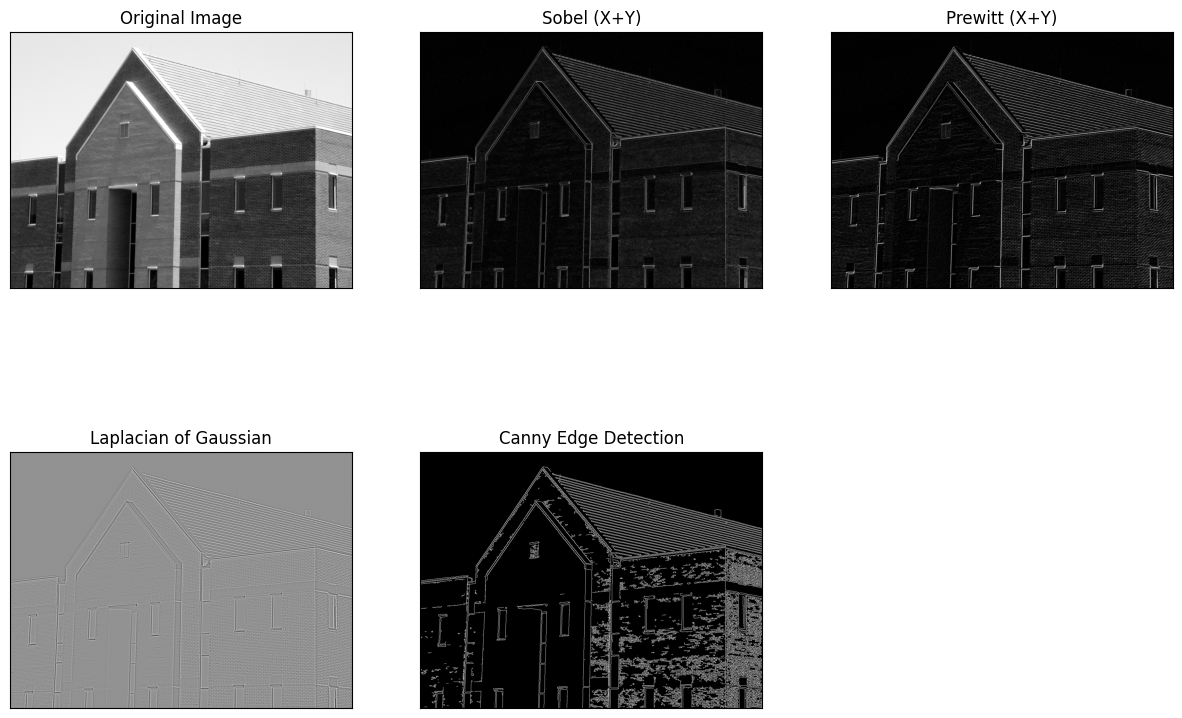

In [ ]:

# Install OpenCV
!pip install opencv-python opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request # Used to download the image

# Function to display images side by side
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1), plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

# Download the image and save it locally
#urllib.request.urlretrieve('https://github.com/opencv/opencv/raw/master/samples/data/lena.jpg', 'lena.jpg')
image ='/content/Fig1025(a)(building_original).tif'

# Load the image (convert to grayscale)
image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Check if image loading was successful
if image is None:
    print("Error: Could not load image.")
    exit() # Exit the program if image loading fails

# 1. First Order Derivative Methods
# Sobel Edge Detection
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = cv2.magnitude(sobelx, sobely)

# Prewitt Edge Detection (simulated using Sobel by changing kernel)
prewittx = cv2.filter2D(image, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitty = cv2.filter2D(image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

# 2. Second Order Derivative Methods
# Laplacian of Gaussian (LoG)
blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Smoothing
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# 3. Optimum Edge Detection Method
# Canny Edge Detection
canny = cv2.Canny(image, 100, 200)

# Display the results
titles = ['Original Image', 'Sobel (X+Y)', 'Prewitt (X+Y)', 'Laplacian of Gaussian', 'Canny Edge Detection']
images = [image, sobel_combined, prewitt_combined, laplacian, canny]

display_images(images, titles)

# New Section

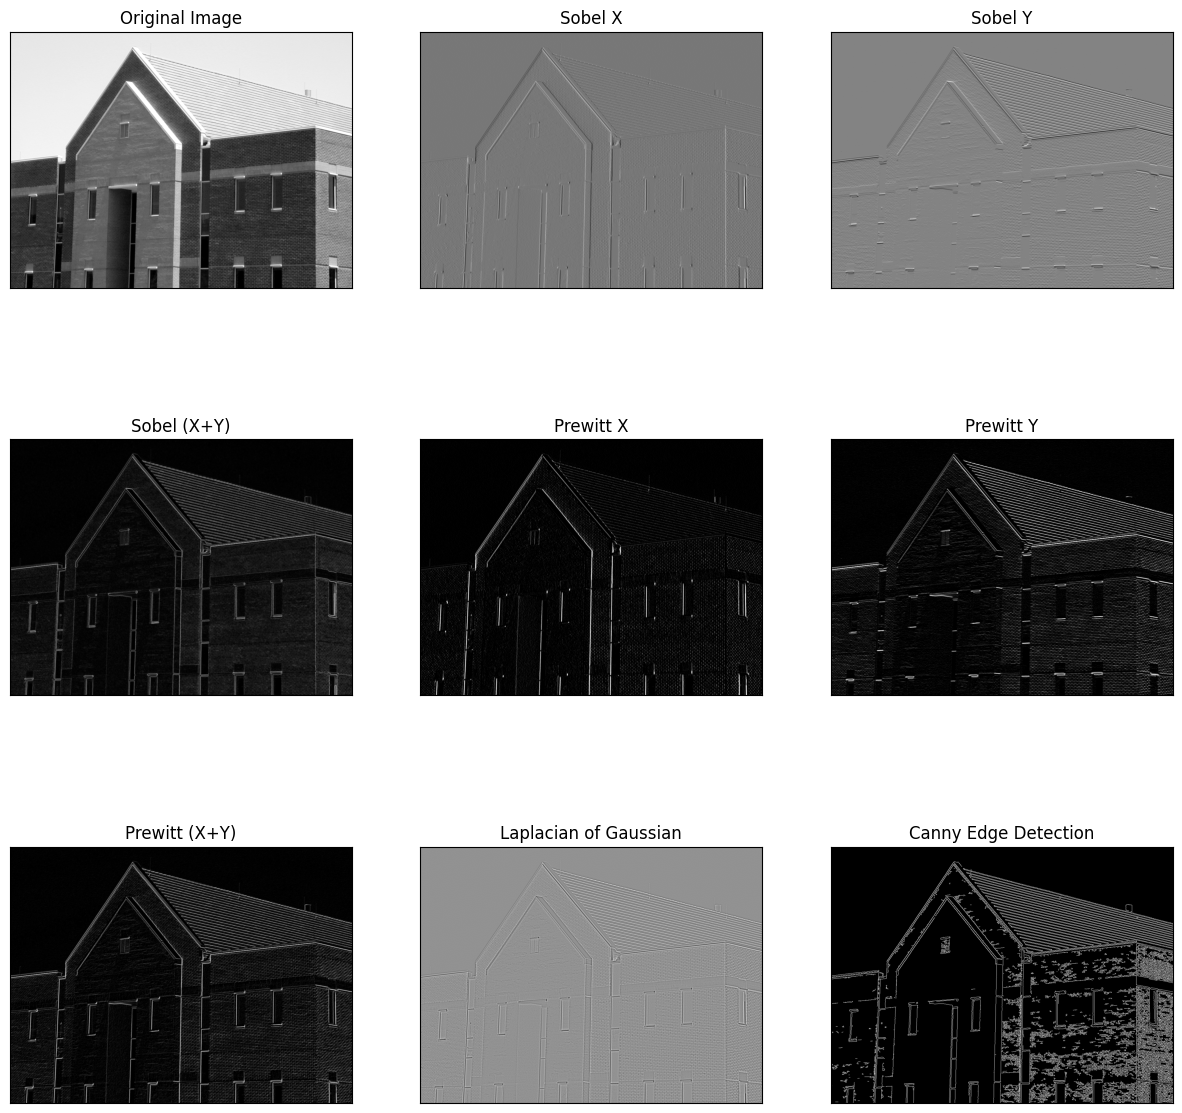

In [ ]:
# Install OpenCV
!pip install opencv-python opencv-python-headless matplotlib

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request # Used to download the image

# Function to display images side by side
def display_images(images, titles):
    num_images = len(images)
    num_rows = (num_images + 2) // 3  # Calculate number of rows for subplot grid

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of images

    for i in range(num_images):
        plt.subplot(num_rows, 3, i + 1), plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()

# Download the image and save it locally
#urllib.request.urlretrieve('https://github.com/opencv/opencv/raw/master/samples/data/lena.jpg', 'lena.jpg')
image ='/content/Fig1025(a)(building_original).tif'

# Load the image (convert to grayscale)
image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Check if image loading was successful
if image is None:
    print("Error: Could not load image.")
    exit() # Exit the program if image loading fails

# 1. First Order Derivative Methods
# Sobel Edge Detection
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = cv2.magnitude(sobelx, sobely)

# Prewitt Edge Detection (simulated using Sobel by changing kernel)
prewittx = cv2.filter2D(image, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitty = cv2.filter2D(image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt_combined = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

# 2. Second Order Derivative Methods
# Laplacian of Gaussian (LoG)
blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Smoothing
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# 3. Optimum Edge Detection Method
# Canny Edge Detection
canny = cv2.Canny(image, 100, 200)

# Display the results
titles = ['Original Image', 'Sobel X', 'Sobel Y', 'Sobel (X+Y)',
          'Prewitt X', 'Prewitt Y', 'Prewitt (X+Y)',
          'Laplacian of Gaussian', 'Canny Edge Detection']
images = [image, sobelx, sobely, sobel_combined,
          prewittx, prewitty, prewitt_combined,
          laplacian, canny]

display_images(images, titles)

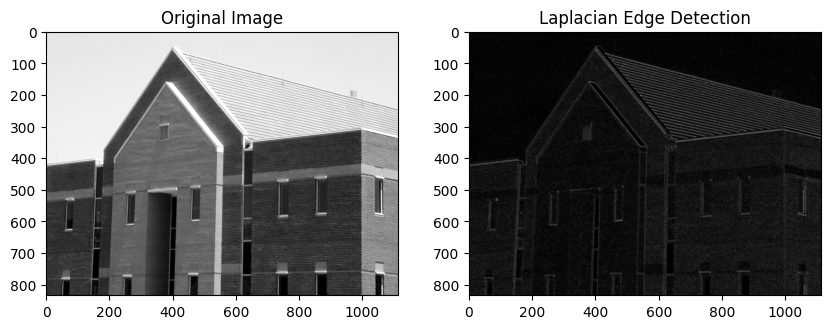

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/Fig1025(a)(building_original).tif', cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian operator
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the original and edge-detected images
plt.figure(figsize=(10, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Laplacian edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplacian Edge Detection')

plt.show()


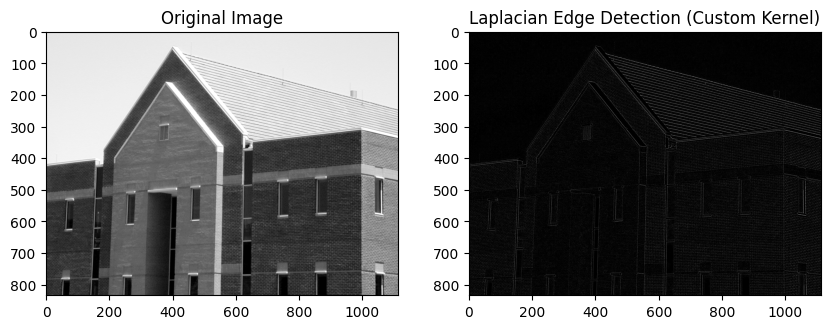

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/Fig1025(a)(building_original).tif', cv2.IMREAD_GRAYSCALE)

# Define the Laplacian kernel (example)
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply the kernel using filter2D
laplacian = cv2.filter2D(image, -1, laplacian_kernel)

# Display the original and edge-detected images
plt.figure(figsize=(10, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Laplacian edge-detected image (using custom kernel)
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian), cmap='gray')  # Take absolute value for visualization
plt.title('Laplacian Edge Detection (Custom Kernel)')

plt.show()

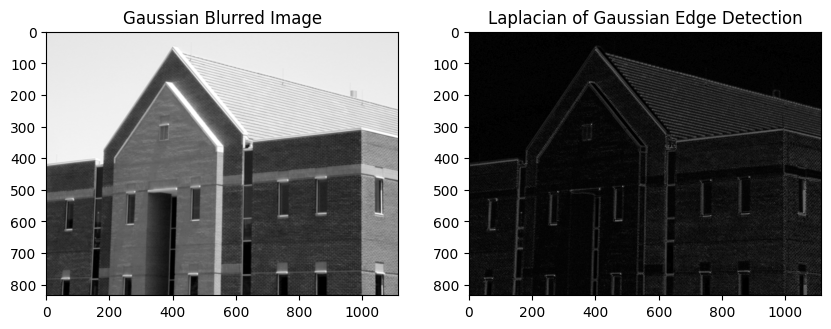

In [ ]:
# Apply Gaussian smoothing
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian operator
laplacian_blurred = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Display results
plt.figure(figsize=(10, 6))

# Blurred image
plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Gaussian Blurred Image')

# Laplacian of Gaussian result
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian_blurred), cmap='gray')
plt.title('Laplacian of Gaussian Edge Detection')

plt.show()


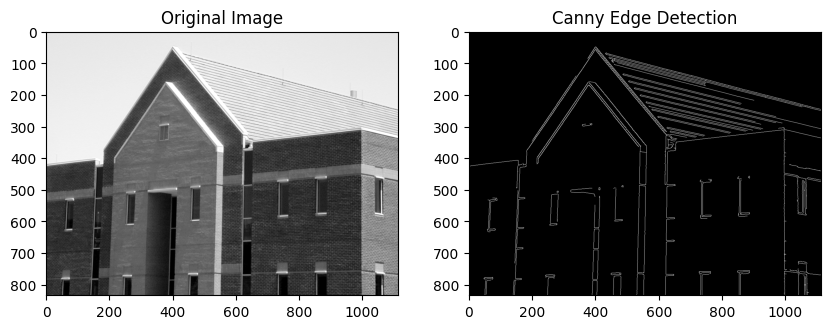

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Fig1025(a)(building_original).tif', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 1.5)

# Apply Canny edge detector
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()


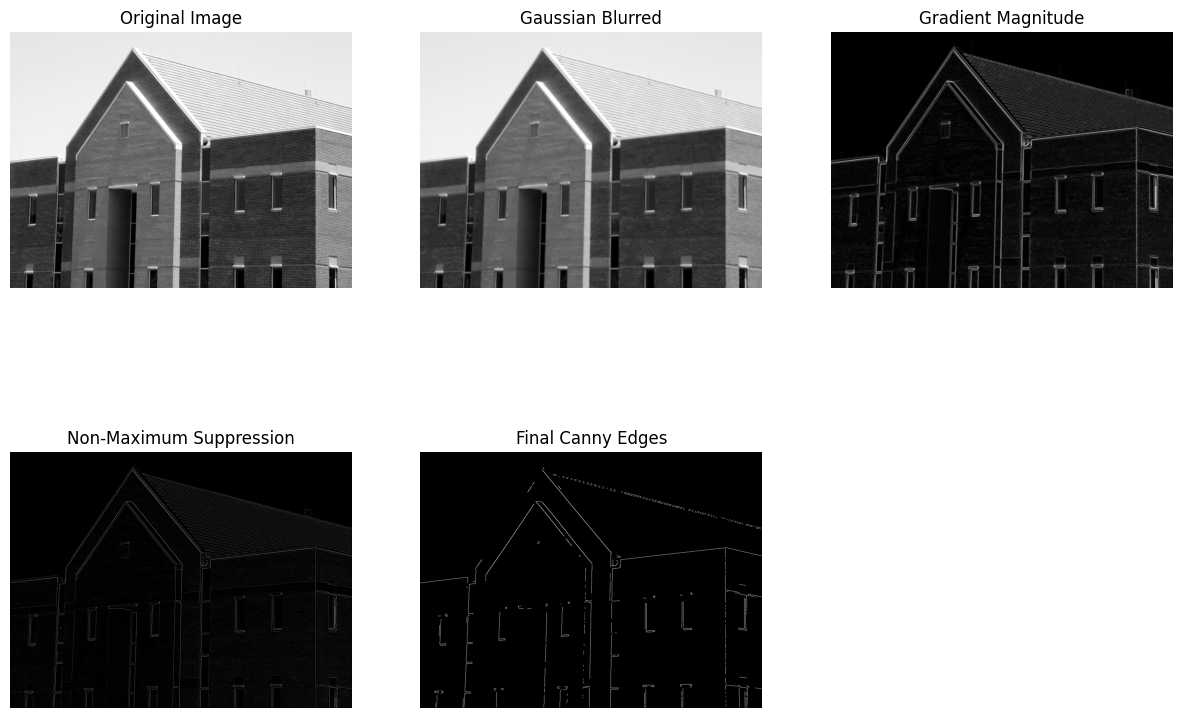

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    num_images = len(images)
    for i in range(num_images):
        plt.subplot(2, (num_images + 1) // 2, i + 1) # Adjusted subplot layout
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Step 1: Load the image
image = cv2.imread('/content/Fig1025(a)(building_original).tif', cv2.IMREAD_GRAYSCALE)

# Step 2: Gaussian Blur to reduce noise
sigma = 1.5
blurred_image = cv2.GaussianBlur(image, (5, 5), sigma)

# Step 3: Compute gradients using Sobel operators
# Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)  # Gx
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)  # Gy

# Apply Sobel filters to get gradients
gradient_x = cv2.filter2D(blurred_image, cv2.CV_64F, sobel_x)
gradient_y = cv2.filter2D(blurred_image, cv2.CV_64F, sobel_y)

# Step 4: Calculate gradient magnitude and direction
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

gradient_direction = np.arctan2(gradient_y, gradient_x) * (180.0 / np.pi)  # in degrees
gradient_direction[gradient_direction < 0] += 180  # Normalize to [0, 180]

# Step 5: Non-Maximum Suppression
height, width = gradient_magnitude.shape
suppressed_image = np.zeros_like(gradient_magnitude)

for i in range(1, height-1):
    for j in range(1, width-1):
        angle = gradient_direction[i, j]

        # Determine the neighboring pixels to compare
        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            neighbors = (gradient_magnitude[i, j + 1], gradient_magnitude[i, j - 1])  # Horizontal
        elif (22.5 <= angle < 67.5):
            neighbors = (gradient_magnitude[i + 1, j - 1], gradient_magnitude[i - 1, j + 1])  # Diagonal /
        elif (67.5 <= angle < 112.5):
            neighbors = (gradient_magnitude[i + 1, j], gradient_magnitude[i - 1, j])  # Vertical
        else:
            neighbors = (gradient_magnitude[i - 1, j - 1], gradient_magnitude[i + 1, j + 1])  # Diagonal \

        # Suppress non-maxima
        if gradient_magnitude[i, j] >= max(neighbors):
            suppressed_image[i, j] = gradient_magnitude[i, j]

# Step 6: Hysteresis Thresholding
high_threshold = 100
low_threshold = 50

strong_edges = (suppressed_image > high_threshold).astype(np.uint8)
weak_edges = ((suppressed_image >= low_threshold) & (suppressed_image <= high_threshold)).astype(np.uint8)

# Final edge image
final_edges = np.zeros_like(suppressed_image)
strong_row, strong_col = np.where(strong_edges == 1)

# Link weak edges to strong edges
for i in range(len(strong_row)):
    x, y = strong_row[i], strong_col[i]
    # Check 8-connectivity
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if 0 <= x + dx < height and 0 <= y + dy < width:
                if weak_edges[x + dx, y + dy] == 1:
                    final_edges[x + dx, y + dy] = 255
    final_edges[x, y] = 255  # Keep strong edges

# Display all images
display_images(
    [image, blurred_image, gradient_magnitude.astype(np.uint8), suppressed_image.astype(np.uint8), final_edges],
    ['Original Image', 'Gaussian Blurred', 'Gradient Magnitude', 'Non-Maximum Suppression', 'Final Canny Edges']
)


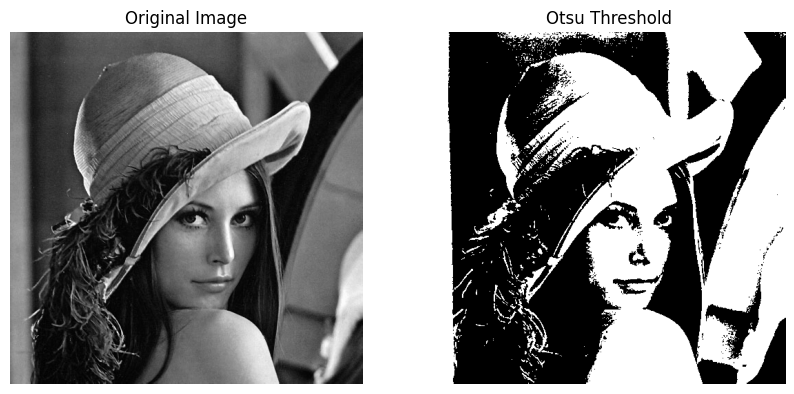

Optimal Otsu threshold value: 91.0


In [ ]:
# Otsu's Thresholding in OpenCV with Python

# Step 1: Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 2: Load the image (grayscale)
image_url = '/content/sample_data/lena.png'
image = cv2.imread(cv2.samples.findFile(image_url), cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error loading image")
else:
    # Step 3: Apply Otsu's thresholding
    _, otsu_threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Step 4: Display the results using matplotlib
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Otsu Thresholded Image
    plt.subplot(1, 2, 2)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title('Otsu Threshold')
    plt.axis('off')

    plt.show()

    # Display the threshold value determined by Otsu's method
    print(f"Optimal Otsu threshold value: {_}")


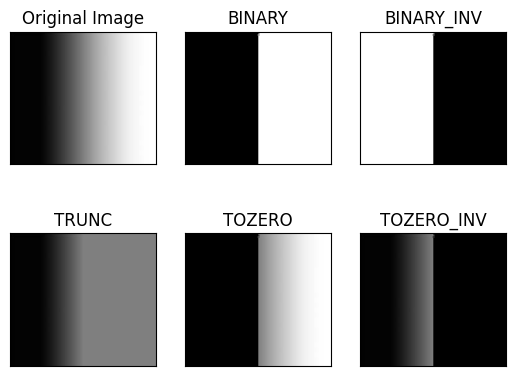

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/sample_data/images (1).jfif', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
import numpy as np

def region_growing(matrix, seed1, seed2, threshold):
    # Define the regions with initial zero values
    rows, cols = matrix.shape
    region = np.zeros_like(matrix)

    # Region 1 conditions
    for i in range(rows):
        for j in range(cols):
            if abs(matrix[i][j] - seed1) < threshold:
                region[i][j] = 1  # Assign region 1

    # Region 2 conditions
    for i in range(rows):
        for j in range(cols):
            if abs(matrix[i][j] - seed2) < threshold and region[i][j] == 0:
                region[i][j] = 2  # Assign region 2

    return region

# Example matrix (input)
matrix = np.array([
    [1, 1, 2, 3, 4],
    [0, 1, 5, 7, 7],
    [2, 5, 6, 6, 5],
    [4, 5, 5, 6, 7]
])

# Seeds and threshold
seed1 = 7
seed2 = 1
threshold = 4

# Perform region growing
segmented_matrix = region_growing(matrix, seed1, seed2, threshold)

# Print the final segmented matrix
print("Original Matrix:")
print(matrix)
print("\nSegmented Regions (1 and 2):")
print(segmented_matrix)


Original Matrix:
[[1 1 2 3 4]
 [0 1 5 7 7]
 [2 5 6 6 5]
 [4 5 5 6 7]]

Segmented Regions (1 and 2):
[[2 2 2 2 1]
 [2 2 1 1 1]
 [2 1 1 1 1]
 [1 1 1 1 1]]


In [ ]:
import cv2
import numpy as np

# Function to check if a region is homogeneous
def is_homogeneous(region, threshold):
    min_val, max_val = np.min(region), np.max(region)
    return (max_val - min_val) <= threshold

# Function to recursively split and merge the image
def split_and_merge(image, threshold):
    def recursive_split(region):
        rows, cols = region.shape
        if rows <= 1 or cols <= 1:
            return np.zeros_like(region, dtype=np.uint8)

        if is_homogeneous(region, threshold):
            return np.ones_like(region, dtype=np.uint8)

        # Split the region into four quadrants
        mid_row, mid_col = rows // 2, cols // 2
        top_left = region[:mid_row, :mid_col]
        top_right = region[:mid_row, mid_col:]
        bottom_left = region[mid_row:, :mid_col]
        bottom_right = region[mid_row:, mid_col:]

        # Create empty segmented image of the same size
        segmented_quadrants = np.zeros_like(region, dtype=np.uint8)

        # Recursive splitting and assignment to segmented_quadrants
        segmented_quadrants[:mid_row, :mid_col] = recursive_split(top_left)
        segmented_quadrants[:mid_row, mid_col:] = recursive_split(top_right)
        segmented_quadrants[mid_row:, :mid_col] = recursive_split(bottom_left)
        segmented_quadrants[mid_row:, mid_col:] = recursive_split(bottom_right)

        return segmented_quadrants

    # Ensure the image is grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    segmented_image = recursive_split(image)
    return segmented_image

# Main function to load and process the image
def main():
   image = cv2.imread('/content/sample_data/water_coins.jpg', cv2.IMREAD_GRAYSCALE)
   if image is None:
        print("Error loading image.")
        return

   threshold = 20  # Adjust this value as needed
   result = split_and_merge(image, threshold)

   cv2.imwrite('segmented_image.png', result * 255)
   cv2.imshow('Segmented Image', result * 255)
   cv2.waitKey(0)
   cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
pip install scikit-image


In [ ]:
# Install OpenCV and scikit-image in Colab
!pip install opencv-python-headless scikit-image

import cv2
import numpy as np
from skimage import color, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import os

# Define input and output video paths
input_video_path = '/content/sample_data/3006972-sd_640_360_24fps.mp4'  # Upload your video and set the path
output_video_path = 'output_with_active_contour.avi'

# Load the video
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    cap.release()
    exit()

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object for saving the output
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Read the first frame to set up the initial contour
ret, frame = cap.read()
if not ret:
    print("Error: Could not read the first frame.")
    cap.release()
    exit()

# Convert to grayscale and apply Gaussian smoothing
gray_frame = color.rgb2gray(img_as_float(frame))  # Ensure input is float for scikit-image functions
smoothed_frame = gaussian(gray_frame, sigma=1)

# Define initial contour - adjust coordinates to fit within your specific frame dimensions
s = np.linspace(0, 2 * np.pi, 400)
x = 220 + 100 * np.cos(s)  # Adjust starting point for your object
y = 180 + 100 * np.sin(s)
initial_contour = np.array([x, y]).T

# Process each frame in the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale and apply Gaussian smoothing
    gray_frame = color.rgb2gray(img_as_float(frame))
    smoothed_frame = gaussian(gray_frame, sigma=1)

    # Apply active contour segmentation
    snake = active_contour(smoothed_frame, initial_contour, alpha=0.015, beta=10, gamma=0.001)

    # Update the initial contour for the next frame
    initial_contour = snake

    # Convert contour points to integer pixel values for display
    snake_int = snake.astype(np.int32)

    # Draw the contour on the frame
    for i in range(len(snake_int) - 1):
        pt1 = (snake_int[i][0], snake_int[i][1])
        pt2 = (snake_int[i+1][0], snake_int[i+1][1])
        cv2.line(frame, pt1, pt2, (0, 255, 0), 2)  # Draw contour in green

    # Write the frame to the output video
    out.write(frame)

# Release video capture and writer objects
cap.release()
out.release()

print("Processing complete. Output video saved as:", output_video_path)




Processing complete. Output video saved as: output_with_active_contour.avi


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Load a sample image or replace it with your own image
image = img_as_float(data.astronaut('/content/sample_data/pexels-garvin-st-villier-719266-3311574.jpg'))  # Load astronaut image as a sample
gray_image = color.rgb2gray(image)  # Convert to grayscale

# Apply Gaussian filter to smooth the image (helps with contour detection)
smoothed_image = gaussian(gray_image, sigma=1)

# Initialize the contour around the object
s = np.linspace(0, 2 * np.pi, 400)
x = 220 + 100 * np.cos(s)  # x-coordinates of the initial contour (adjust if needed)
y = 180 + 100 * np.sin(s)  # y-coordinates of the initial contour (adjust if needed)
initial_contour = np.array([x, y]).T  # Stack as [x, y] pairs

# Perform active contour segmentation
snake = active_contour(
    smoothed_image,
    initial_contour,
    alpha=0.015,     # Elasticity parameter (controls smoothness)
    beta=10,         # Bending parameter (controls rigidity)
    gamma=0.001,     # Step size
    max_iterations=2500  # Maximum number of iterations
)

# Plotting the results
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_image, cmap=plt.cm.gray)
ax.plot(initial_contour[:, 0], initial_contour[:, 1], '--r', lw=2, label="Initial Contour")
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=2, label="Final Contour")
ax.legend()
plt.show()


TypeError: astronaut() takes 0 positional arguments but 1 was given

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3061, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/

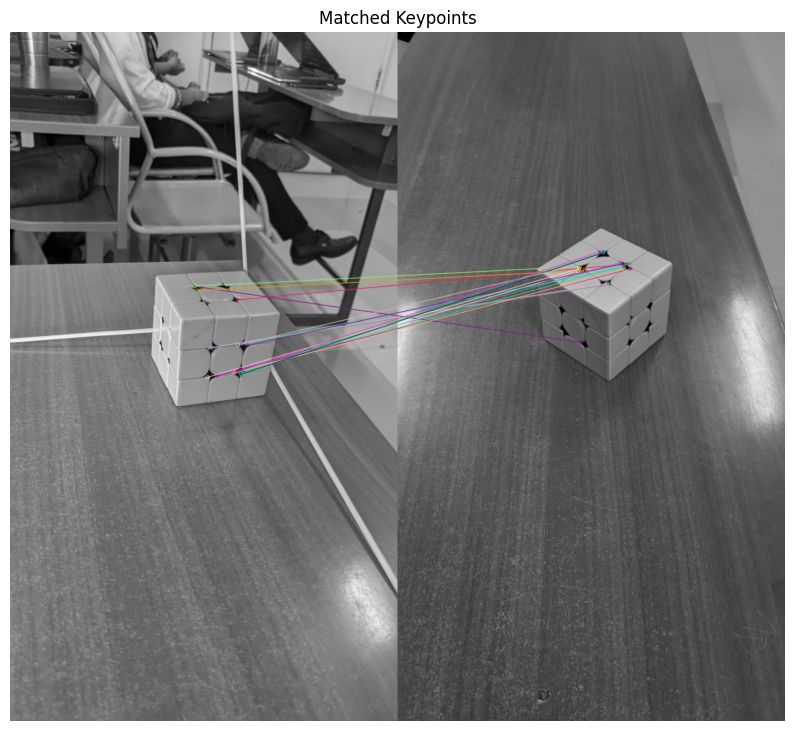

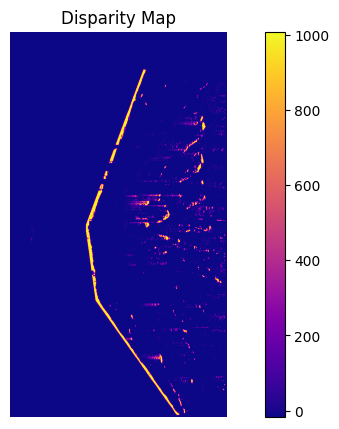

3D Points Sample:
 [[[ 22.5    -40.       0.0625]
  [ 22.4375 -40.       0.0625]
  [ 22.375  -40.       0.0625]
  [ 22.3125 -40.       0.0625]
  [ 22.25   -40.       0.0625]]

 [[ 22.5    -39.9375   0.0625]
  [ 22.4375 -39.9375   0.0625]
  [ 22.375  -39.9375   0.0625]
  [ 22.3125 -39.9375   0.0625]
  [ 22.25   -39.9375   0.0625]]

 [[ 22.5    -39.875    0.0625]
  [ 22.4375 -39.875    0.0625]
  [ 22.375  -39.875    0.0625]
  [ 22.3125 -39.875    0.0625]
  [ 22.25   -39.875    0.0625]]

 [[ 22.5    -39.8125   0.0625]
  [ 22.4375 -39.8125   0.0625]
  [ 22.375  -39.8125   0.0625]
  [ 22.3125 -39.8125   0.0625]
  [ 22.25   -39.8125   0.0625]]

 [[ 22.5    -39.75     0.0625]
  [ 22.4375 -39.75     0.0625]
  [ 22.375  -39.75     0.0625]
  [ 22.3125 -39.75     0.0625]
  [ 22.25   -39.75     0.0625]]]


In [ ]:
# Install OpenCV if not already installed
!pip install opencv-python opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


# Set paths to the images on your Drive(use your image )
img1_path = '/content/sample_data/WhatsApp Image 2024-11-19 at 10.04.20 AM.jpeg'  # Replace 'your_folder' with the actual folder path
img2_path = '/content/sample_data/WhatsApp Image 2024-11-19 at 7.52.48 AM.jpeg'


img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Detect features using ORB
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Extract matched points
pts1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
pts2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

# Estimate Fundamental Matrix
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

# Select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

# Rectify images
h1, w1 = img1.shape
_, H1, H2 = cv2.stereoRectifyUncalibrated(pts1, pts2, F, imgSize=(w1, h1))

img1_rectified = cv2.warpPerspective(img1, H1, (w1, h1))
img2_rectified = cv2.warpPerspective(img2, H2, (w1, h1))

# Compute disparity map
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=15)
disparity = stereo.compute(img1_rectified, img2_rectified)

# Reconstruct 3D points
h, w = disparity.shape
focal_length = 1.0  # Assume focal length (adjust as needed)
Q = np.float32([[1, 0, 0, -w / 2],
                [0, -1, 0, h / 2],
                [0, 0, 0, -focal_length],
                [0, 0, 1, 0]])  # Reprojection matrix

points_3d = cv2.reprojectImageTo3D(disparity, Q)

# Visualize results
# Matched Keypoints
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None, flags=2)
plt.figure(figsize=(10, 10))
plt.title('Matched Keypoints')
plt.imshow(img_matches)
plt.axis('off')
plt.show()

# Disparity Map
plt.figure(figsize=(10, 5))
plt.title('Disparity Map')
plt.imshow(disparity, cmap='plasma')
plt.colorbar()
plt.axis('off')
plt.show()

# Print 3D Points
print("3D Points Sample:\n", points_3d[:5, :5, :])  # Print a sample of 3D points
